## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score , confusion_matrix , ConfusionMatrixDisplay
import pickle

## Read CSV files(Fake.csv , True.csv)

In [2]:
data_dir = "/run/media/meysam/PROGRAM/0.data/Fake News Detection Dataset/News _dataset"

In [3]:
files = os.listdir(data_dir)
files = list(map(lambda a:data_dir+"/"+a , files))

In [4]:
files

['/run/media/meysam/PROGRAM/0.data/Fake News Detection Dataset/News _dataset/Fake.csv',
 '/run/media/meysam/PROGRAM/0.data/Fake News Detection Dataset/News _dataset/True.csv']

In [5]:
fakes = pd.read_csv(files[0])
trues = pd.read_csv(files[1])

In [6]:
fakes

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [41]:
trues['text']

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

## Check the data features

In [8]:
print("Fakes data columns :",fakes.columns)
print("Trues data columns :",trues.columns)

Fakes data columns : Index(['title', 'text', 'subject', 'date'], dtype='object')
Trues data columns : Index(['title', 'text', 'subject', 'date'], dtype='object')


In [9]:
fakes.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
trues.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
fakes.subject.value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [12]:
trues.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [13]:
fakes = fakes[["title","text"]]
trues = trues[["title","text"]]

In [14]:
fakes

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...


## Combine fakes and trues
### Labels:
- Fakes -> 1
- Trues -> 0

In [15]:
fakes["feature"] = fakes['title'] + " " + fakes["text"]
trues["feature"] = trues["title"] + " " + trues["text"]
fakes

/tmp/ipykernel_7971/2765847362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes["feature"] = fakes['title'] + " " + fakes["text"]
/tmp/ipykernel_7971/2765847362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trues["feature"] = trues["title"] + " " + trues["text"]


,title,text,feature
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,How to Blow $700 Million: Al Jazeera America F...


In [16]:
fakes_array = np.array(fakes.feature)
fakes_target = np.ones((len(fakes),1))
trues_array = np.array(trues.feature)
trues_target = np.zeros((len(trues),1))
features = np.concatenate((fakes_array,trues_array),axis=0)
targets = np.concatenate((fakes_target,trues_target),axis=0)
print(f"targets:{targets.shape} , texts:{features.shape}")
# samples = np.random.choice([i for i in range(len(features))],1500)
# features = features[samples]
# targets = targets[samples]
# print(f"targets:{targets.shape} , texts:{features.shape} After sampling")

targets:(44898, 1) , texts:(44898,)


## Vectorize

In [17]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(features)
features.shape

(44898, 122513)

In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,targets,test_size=0.25,random_state=41)
print(f"shape of Xtrain:{Xtrain.shape} , shape of Xtest:{Xtest.shape}\nshape of Ytrain:{Ytrain.shape} , shape of Ytest:{Ytest.shape}")

shape of Xtrain:(33673, 122513) , shape of Xtest:(11225, 122513)
shape of Ytrain:(33673, 1) , shape of Ytest:(11225, 1)


## Build the model

In [21]:
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)
pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

/home/meysam/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Accuracy

In [22]:
print(f"Accuracy:\n Train -> {accuracy_score(pred_train,Ytrain)}\n Test  -> {accuracy_score(pred_test,Ytest)}")

Accuracy:
 Train -> 0.9928132331541591
 Test  -> 0.9867260579064588


### Recall

In [23]:
print(f"Recall:\n Train -> {recall_score(pred_train,Ytrain)}\n Test  -> {recall_score(pred_test,Ytest)}")

Recall:
 Train -> 0.9937934176061952
 Test  -> 0.9894378194207837


### Precision

In [24]:
print(f"Precision:\n Train -> {precision_score(pred_train,Ytrain)}\n Test  -> {precision_score(pred_test,Ytest)}")

Precision:
 Train -> 0.9924371659274422
 Test  -> 0.9852417302798983


### F1-score

In [25]:
print(f"F1-score:\n Train -> {f1_score(pred_train,Ytrain)}\n Test  -> {f1_score(pred_test,Ytest)}")

F1-score:
 Train -> 0.9931148287242517
 Test  -> 0.9873353166170846


## Sample of Test Data

In [26]:
predict_Label = {0:"True",1:"Fake"}

In [27]:
print(f"Labels    -> {Ytest[0:10].reshape([-1])}")
print(f"Predicted -> {pred_test[0:10]}")

Labels    -> [0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
Predicted -> [0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]


In [28]:
print(f"Labels    -> {list(map(lambda a:predict_Label[a],Ytest[0:10].reshape([-1])))}")
print(f"Predicted -> {list(map(lambda a:predict_Label[a],pred_test[0:10]))}")

Labels    -> ['True', 'Fake', 'True', 'True', 'True', 'Fake', 'True', 'True', 'Fake', 'Fake']
Predicted -> ['True', 'Fake', 'True', 'True', 'True', 'Fake', 'True', 'True', 'Fake', 'Fake']


## Confusion Matrix

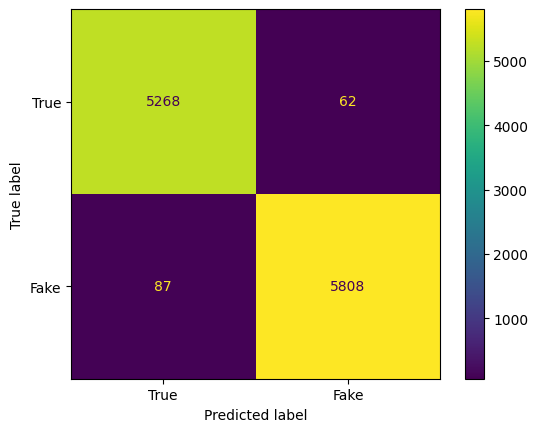

In [29]:
confusion = confusion_matrix(Ytest,pred_test)
ConfusionMatrixDisplay(confusion_matrix= confusion,display_labels=["True","Fake"]).plot()
plt.show()

## Save the model and vectorizer

In [30]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)
with open("Vectorizer.pkl","wb") as f:
    pickle.dump(vectorizer,f)


## Load the model and vectorizer 

In [247]:
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)
# with open("Vectorizer.pkl","rb") as f:
#     vect = pickle.load(f)